In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import fnmatch
import json
import os

ValueError: need at least one array to stack

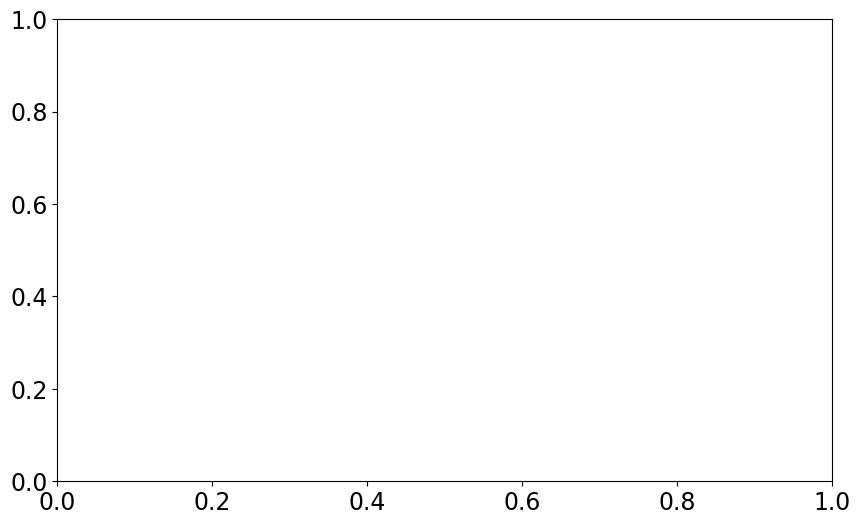

In [ ]:
# plt.rcParams["font.family"] = "sans-serif"
# plt.rcParams["font.sans-serif"] = ["Noto Sans"]
plt.rcParams["font.size"] = 17
figsize = (10, 6)

no_delayed_batches = [0.1, 0.2, 0.3, 0.4]
delay_labels = [10, 50, 80, 100]
datasets = ["SplitMNIST", "SplitFashionMNIST", "SplitCIFAR10"]
# strategies = [["EDR", "RER", "ER_l", "ER_2B"], ["EDR", "ER_f"]]
strategies = [["EDR", "RER", "ER_l"], ["EDR", "ER_2B"], ["EDR", "ER_f"]]

for dataset in datasets:
    for no_delayed_batch in no_delayed_batches:
        for delay_label in delay_labels:
            for value_strategies in strategies:
                
                _, ax = plt.subplots(figsize=figsize)
                for strategy in value_strategies:

                    # List all files in the folder (adjust pattern if needed)
                    results_folder = f"results_{dataset}"
                    files = [f for f in os.listdir(results_folder) if fnmatch.fnmatch(f, f"results_{dataset}_{delay_label}_{no_delayed_batch}_32_5_{strategy}_64_128_5_1_*.json")]

                    accuracies = []
                    list_ttt_windowed_task_index = []
                    for fname in files:
                        with open(os.path.join(results_folder, fname), "r") as f:
                            data = json.load(f)
                            
                            acc = np.array(data["ttt_metrics_per_window_accuracy"])
                            ttt_windowed_task_index = np.array(data["ttt_windowed_task_index"])
                            list_ttt_windowed_task_index.append(ttt_windowed_task_index)
                            accuracies.append(acc)

                    # Stack all runs into a single array: shape (n_runs, n_steps)
                    runs_accuracy = np.stack(accuracies)
                    runs_task_index = np.stack(list_ttt_windowed_task_index)

                    mean_accuracy = runs_accuracy.mean(axis=0)
                    std_accuracy = runs_accuracy.std(axis=0)

                    mean_task_index = runs_task_index.mean(axis=0)

                    ax.plot(mean_task_index, mean_accuracy, label=strategy)
                    ax.fill_between(mean_task_index, mean_accuracy - std_accuracy, mean_accuracy + std_accuracy, alpha=0.3)  
                    ax.set_xlabel("Task")
                    ax.set_ylabel("Accuracy")
                    ax.legend()

                plt.savefig(f"ocl_plots/results_{dataset}_{delay_label}_{no_delayed_batch}_32_5_{'_'.join(value_strategies)}_64_128_5_1_all.png", bbox_inches='tight', dpi=300)



In [19]:
#Table for final results


plt.rcParams["font.size"] = 17
figsize = (10, 6)

no_delayed_batches = [0.4]
delay_labels = [100]
datasets = ["SplitMNIST", "SplitFashionMNIST", "SplitCIFAR10"]
strategies = ["EDR", "RER", "ER_l","ER_2B"]

for dataset in datasets:
    for no_delayed_batch in no_delayed_batches:
        for delay_label in delay_labels:
            for strategy in strategies:

                results_folder = f"results_{dataset}"
                files = [f for f in os.listdir(results_folder) if fnmatch.fnmatch(f, f"results_{dataset}_{delay_label}_{no_delayed_batch}_32_5_{strategy}_64_128_5_1_*.json")]

                list_ttt_cumulative_accuracy = []
                list_accuracy_seen_avg = []
                list_anytime_accuracy_all_avg = []
                list_accuracy_all_avg = []
                for fname in files:
                    with open(os.path.join(results_folder, fname), "r") as f:
                        data = json.load(f)
                        
                        
                        ttt_cumulative_accuracy = np.array(data["ttt_cumulative_accuracy"])
                        accuracy_seen_avg = np.array(data["accuracy_seen_avg"])
                        anytime_accuracy_all_avg = np.array(data["anytime_accuracy_all_avg"])
                        accuracy_all = np.array(data["accuracy_all"])
                        accuracy_all_avg = accuracy_all.mean(axis=0)

                        list_ttt_cumulative_accuracy.append(ttt_cumulative_accuracy)
                        list_accuracy_seen_avg.append(accuracy_seen_avg)
                        list_anytime_accuracy_all_avg.append(anytime_accuracy_all_avg)
                        list_accuracy_all_avg.append(accuracy_all_avg)

                # Stack all runs into a single array: shape (n_runs, n_steps)
                runs_ttt_cumulative_accuracy = np.stack(list_ttt_cumulative_accuracy)
                runs_accuracy_seen_avg = np.stack(list_accuracy_seen_avg)
                runs_anytime_accuracy_all_avg = np.stack(list_anytime_accuracy_all_avg)
                runs_accuracy_all_avg = np.stack(list_accuracy_all_avg)

                mean_ttt_cumulative_accuracy = runs_ttt_cumulative_accuracy.mean(axis=0)
                std_ttt_cumulative_accuracy = runs_ttt_cumulative_accuracy.std(axis=0)

                mean_accuracy_seen_avg = runs_accuracy_seen_avg.mean(axis=0)
                std_accuracy_seen_avg = runs_accuracy_seen_avg.std(axis=0)

                mean_anytime_accuracy_all_avg = runs_anytime_accuracy_all_avg.mean(axis=0)
                std_anytime_accuracy_all_avg = runs_anytime_accuracy_all_avg.std(axis=0)

                mean_accuracy_all_avg = runs_accuracy_all_avg.mean(axis=0)
                std_accuracy_all_avg = runs_accuracy_all_avg.std(axis=0)
               
                print(f"Dataset: {dataset}, Strategy: {strategy}")
                print(f"Final TTT Cumulative Accuracy: {mean_ttt_cumulative_accuracy} ± {std_ttt_cumulative_accuracy}")
                print(f"Final Accuracy Seen Avg: {mean_accuracy_seen_avg} ± {std_accuracy_seen_avg}")
                print(f"Final Anytime Accuracy All Avg: {mean_anytime_accuracy_all_avg} ± {std_anytime_accuracy_all_avg}")
                print(f"Final Accuracy All Avg: {mean_accuracy_all_avg} ± {std_accuracy_all_avg}")


Dataset: SplitMNIST, Strategy: EDR
Final TTT Cumulative Accuracy: 81.6624193548387 ± 1.105232329223532
Final Accuracy Seen Avg: 0.3498410024950581 ± 0.0011324295983509546
Final Anytime Accuracy All Avg: 0.20346187007042668 ± 0.0009194642439836451
Final Accuracy All Avg: 0.2100860698569205 ± 0.0006377103498218921
Dataset: SplitMNIST, Strategy: RER
Final TTT Cumulative Accuracy: 78.1195698924731 ± 1.2156428869645841
Final Accuracy Seen Avg: 0.34737172761271073 ± 0.0015072472235237659
Final Anytime Accuracy All Avg: 0.20149407559825527 ± 0.0008029877140943644
Final Accuracy All Avg: 0.20816112093387112 ± 0.0008816380915244885
Dataset: SplitMNIST, Strategy: ER_l
Final TTT Cumulative Accuracy: 45.013655913978496 ± 1.0451783318669083
Final Accuracy Seen Avg: 0.33958376030768117 ± 0.0016916373022584346
Final Anytime Accuracy All Avg: 0.18663851772585222 ± 0.0009546486971515973
Final Accuracy All Avg: 0.20330883504882932 ± 0.0010521115125059848
Dataset: SplitMNIST, Strategy: ER_2B
Final TTT Cu